In [10]:
# Setup
library(dplyr)
library(ggplot2)
library(forcats)
library(gt)
library(gghighlight)
library(quartomonothemer)
library(showtext)
library(sysfonts)   # menangani file font

font_add_google("Noto Sans",       "noto")        # alias 'noto'
font_add_google("Montserrat",      "mont")        # alias 'mont'
font_add_google("Josefin Sans",    "josefin")     # alias 'josefin'

font_title <- "Josefin Sans"
font_text <- "Montserrat"
font_sans <- "Noto Sans" 
color_base <- "#009F8C"
color_base_light <- "#95DFD6"
color_accent <- "#B75C9D"
color_accent_light <- "#DBA6CC"
gray <- "#bebebe"
darkgray <- "#6d6d6d"

showtext_auto()

style_mono_quarto(
  font_title = font_title,
  font_text = font_text,
  font_sans = font_sans,
  color_base = color_base,
  color_accent = color_accent,
  color_link = color_accent,
  color_code = color_base,
  size_base = 30
)

## Slides 5

In [11]:
# import data from data/slides5.csv
plan_data <- read.csv("data/slides5.csv")
# display the first few rows of the data
# Delte row if NA exists in the 'ques' column
plan_data <- plan_data[!is.na(plan_data$ques), ]
plan_data <- plan_data[-5, ]  # Delete row 5

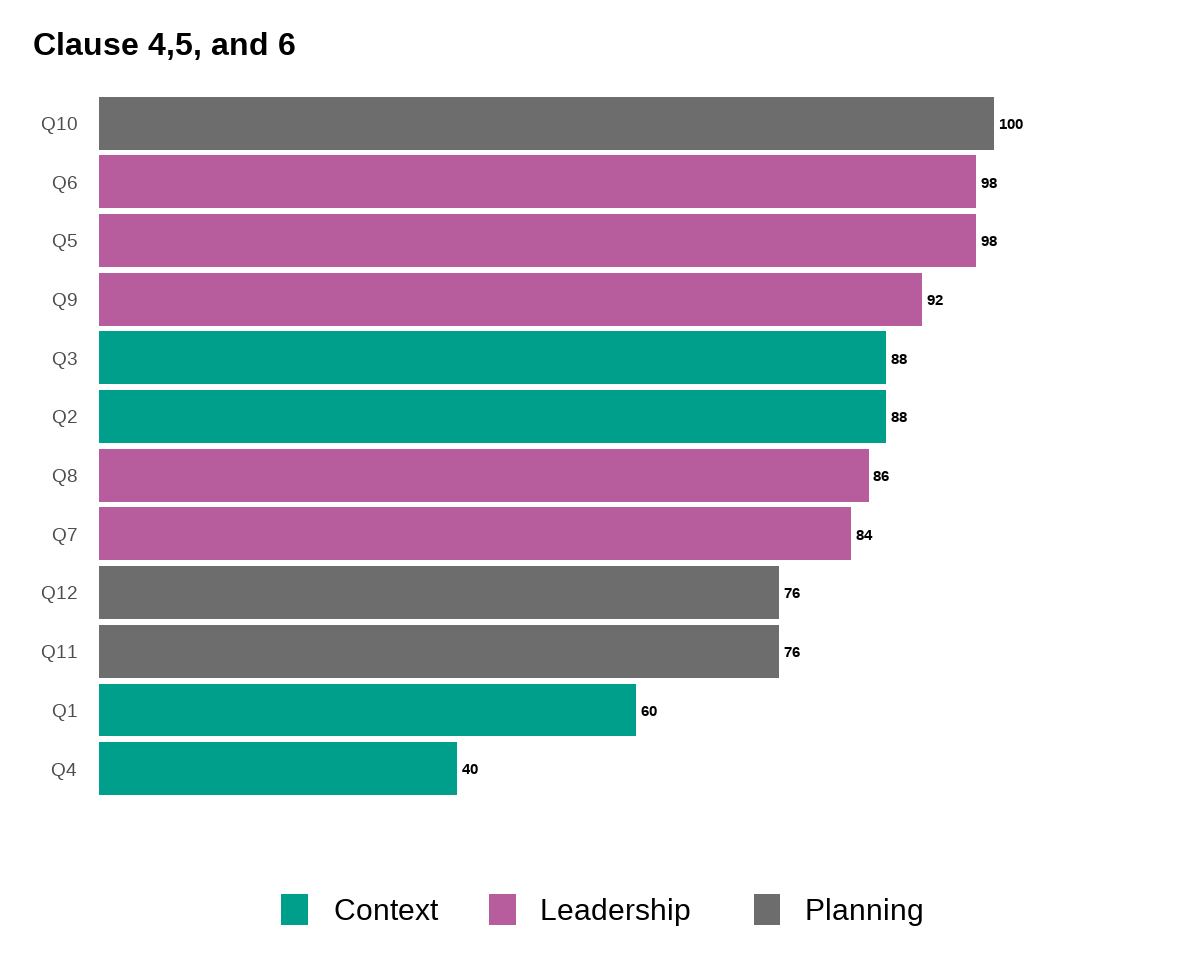

In [12]:
# Making ggplot bar chart with theme_quarto() grouped by 'group'
# Y-axis is 'ques' and X-axis is 'value'

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

# Suppress warnings
options(warn = -1)

# Making ggplot bar chart with theme_quarto() grouped by 'group'
# Y-axis is 'ques' and X-axis is 'value'
plan_data |>
    ggplot(aes(x = value, y = fct_reorder(ques, value), fill = group)) +
    geom_col(position = "dodge") +
    geom_text(aes(label = value),
                        hjust = 0, nudge_x = 0.5,
                        size = 4, fontface = "bold", family = font_text) +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Clause 4,5, and 6",
        x = "",
        y = NULL,
        fill = "Group"
    ) +
    scale_fill_manual(values = c(color_base, color_accent, darkgray)) +
    theme_quarto() +
    theme(
        legend.position = "bottom",
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 14, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    )

# Reset warning options
options(warn = 0)

## Slides 6

Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate




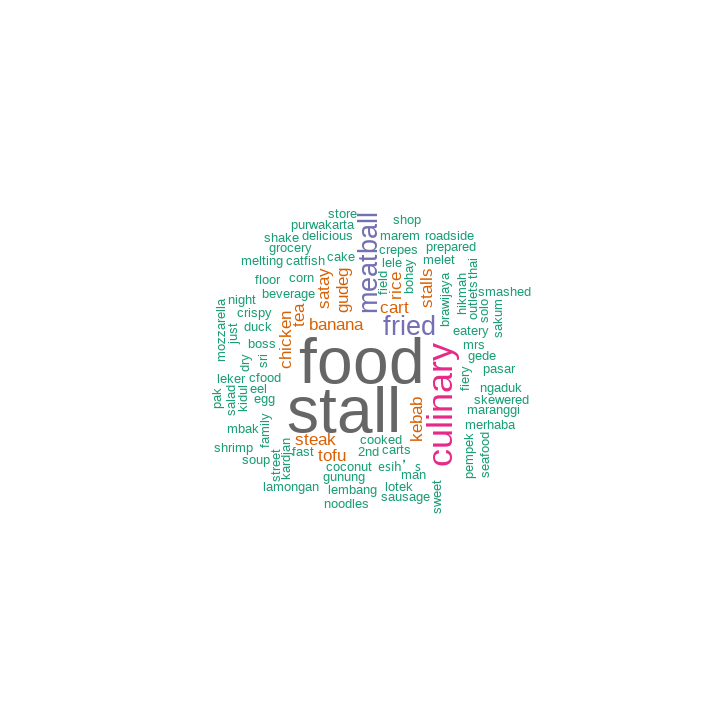

In [13]:
# type of shop
# 'Food''Culinary''Food Outlets''grocery store''Teh bohay kuliner''Warong''Finished Food''Dry food''Food stalls''Stall''Roadside carts''Merhaba Kebab''Warung Lotek Bu Esih''Juragan pempek''Warung Sate Kardjan''Mie baso sakum''Bebek Garang''B & JO Banana Crispy dan Pisang Lilit''Ayam Geprek''FnB''Street food''Rombong Baso Goreng Lembang''Warung Makan "Gudeg Pas Enak"''Ruko nasgor''Kuliner Baso Tahu''Warung Sate Maranggi Purwakarta''Seafood''Belut sawah''Tahu gimbal''Warung Bakso "Marem"''Warung Nasi Gudeg "Mbak Sri"''Pancong lumer 99''Rombong soto lamongab''Jagung Manis Mozarella "Ngaduk"''Thai tea dan sosil telur''Leker Crepes Family''Warung Al Hikmah''Kebab''Evening Culinary''Pasar Gede Lt.2 Solo''Warung  "Lele Melet"''Brawijaya Steak''Warung Makanan cepat saji (matengan) Pak Man Gunung Kidul''Warung Steak and Shake'
# Reset warning options
options(warn = -1)

# Set plot dimensions
options(repr.plot.width = 6, repr.plot.height = 6)

# Load required libraries for word cloud
library(wordcloud)
library(tm)
library(RColorBrewer)

# Extract shop types and remove NAs
shop_types  <- read.csv("data/slides6.csv")

# Create a text corpus
corpus <- Corpus(VectorSource(shop_types))

# Clean the text
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("english"))

# Create a term-document matrix
tdm <- TermDocumentMatrix(corpus)
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word=names(v), freq=v)

# Generate the word cloud
set.seed(1234) # For reproducibility
wordcloud(words=d$word, freq=d$freq, min.freq=1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))
# Reset warning options

options(warn = 0)          

## Slides 7 and 8 

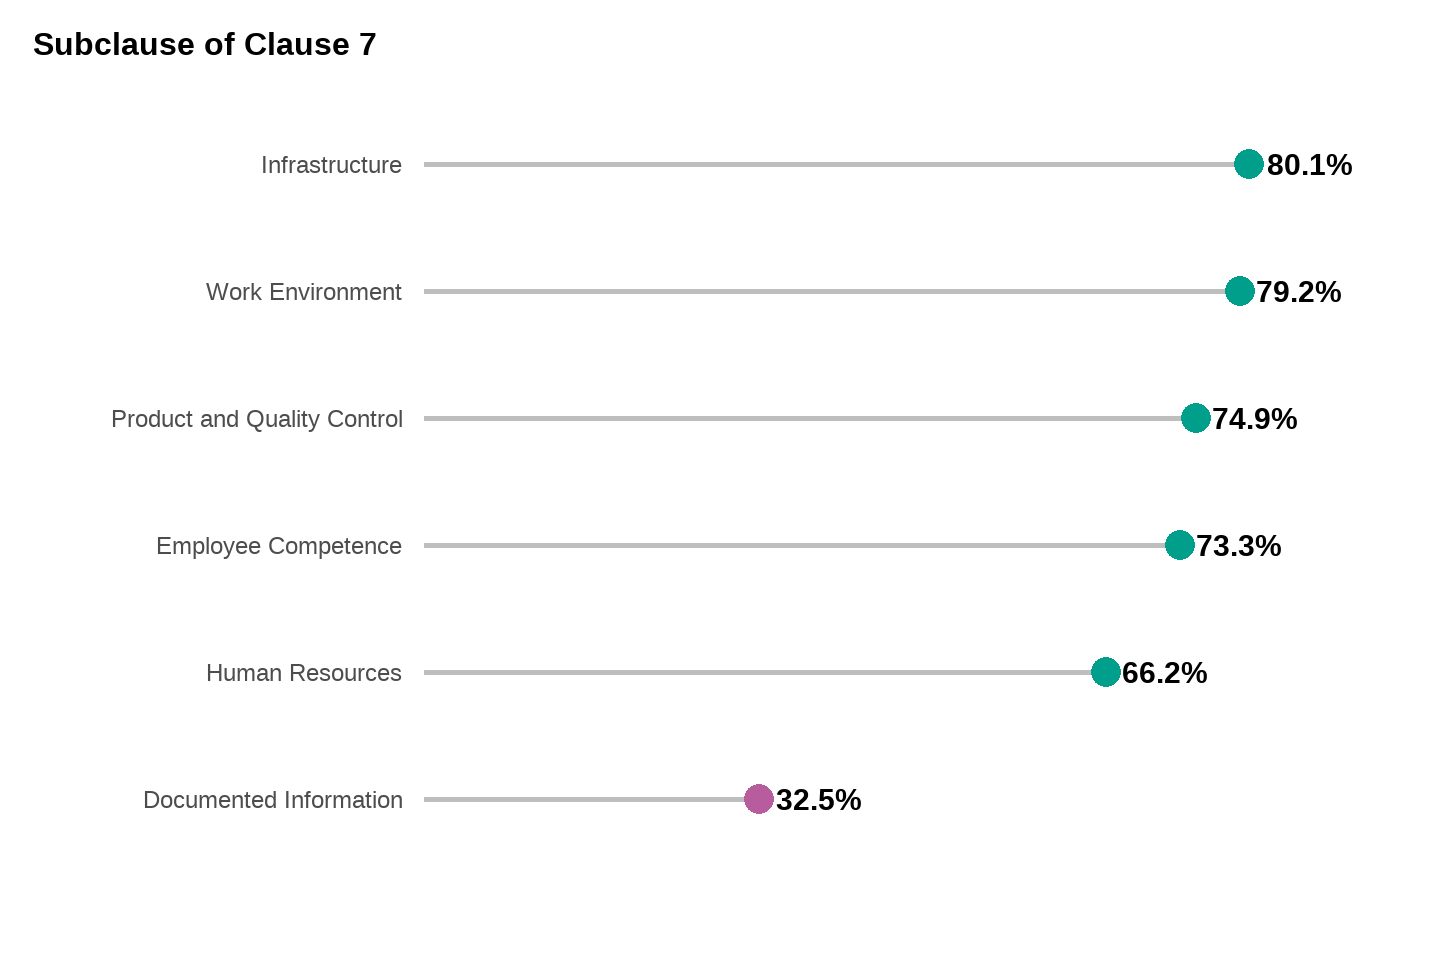

In [15]:
options(warn = -1)
official_data <- read.csv("data/slides7.csv")

# Set plot dimensions
options(repr.plot.width = 12, repr.plot.height = 8)

# Create lollipop chart with custom styling
official_data |>
    ggplot(aes(x = Average_Percentage, y = fct_reorder(Category, Average_Percentage))) +
    geom_segment(aes(x = 0, xend = Average_Percentage, y = Category, yend = Category), 
                 color = gray, size = 1.5) +
    geom_point(aes(color = ifelse(Average_Percentage < 50, color_accent, color_base)), 
               size = 8) +
    geom_text(aes(label = paste0(round(Average_Percentage, 1), "%")),
              hjust = -0.2, size = 8, fontface = "bold", family = font_text) +
    scale_color_identity() +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Subclause of Clause 7",
        x = "",
        y = NULL
    ) +
    theme_quarto() +
    theme(
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 18, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    )

options(warn = 0)

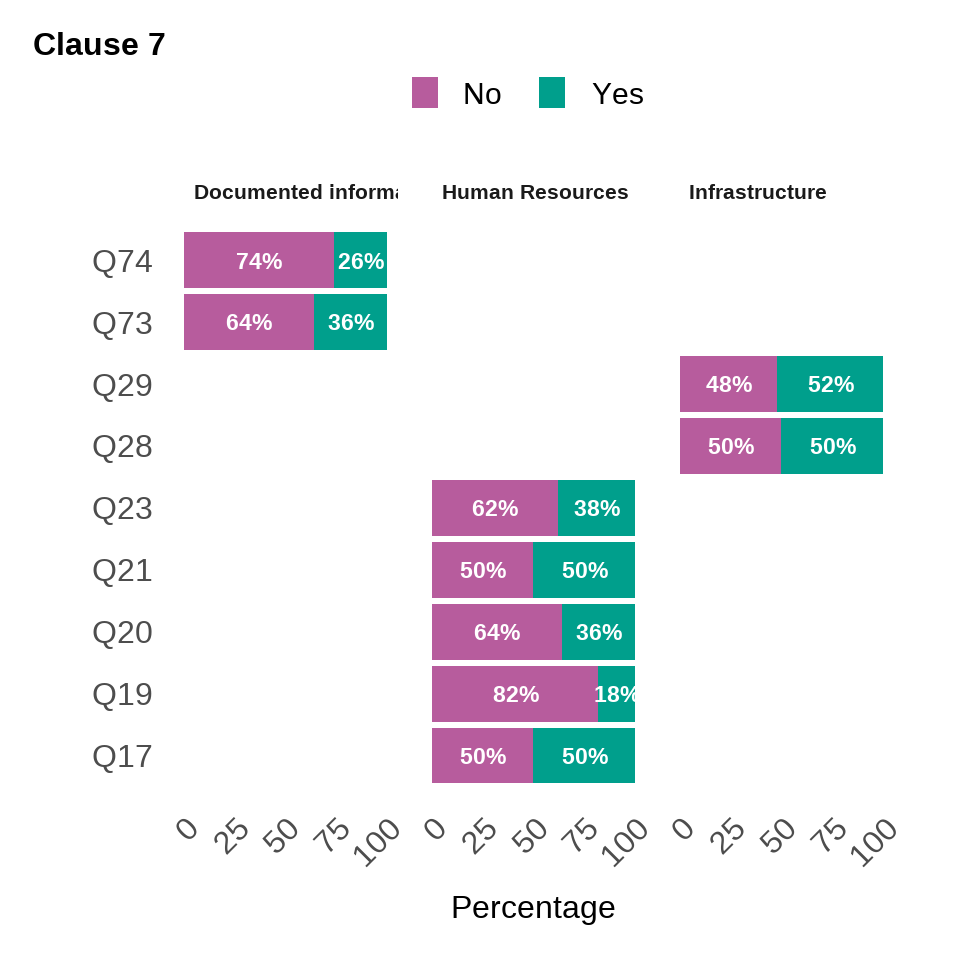

In [9]:
options(warn = -1)

support_data_long <- read.csv("data/slides8.csv")

# Set plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8)

# Reorder the Response factor to put "Yes" first
support_data_long$Response <- factor(support_data_long$Response, levels = c("Yes", "No"))

# Create stacked bar chart with custom styling
ggplot(support_data_long, aes(x = ques, y = Percentage, fill = Response)) +
     geom_bar(stat = "identity") +
     geom_text(aes(label = paste0(round(Percentage, 1), "%")), 
                              position = position_stack(vjust = 0.5), 
                              size = 6, color = "white", fontface = "bold", family = font_text) +
     coord_flip() +
     scale_fill_manual(values = c("Yes" = color_base, "No" = color_accent),
                       guide = guide_legend(reverse = TRUE)) +
     facet_wrap(~ group, scales = "free_x") +
     labs(title = "Clause 7",
                x = "", 
                y = "Percentage",
                fill = "Response") +
     theme_quarto() +
     theme(
          axis.text.x = element_text(angle = 45, hjust = 1, family = font_sans),
          axis.text.y = element_text(family = font_sans),
          strip.text = element_text(face = "bold", family = font_title, size = 16),
          legend.position = "top",
          plot.title = element_text(size = 24, face = "bold", family = font_title),
          panel.grid = element_blank(),
          axis.ticks = element_blank(),
          plot.margin = margin(20, 40, 20, 20)
     )

options(warn = 0)

## Slides 9

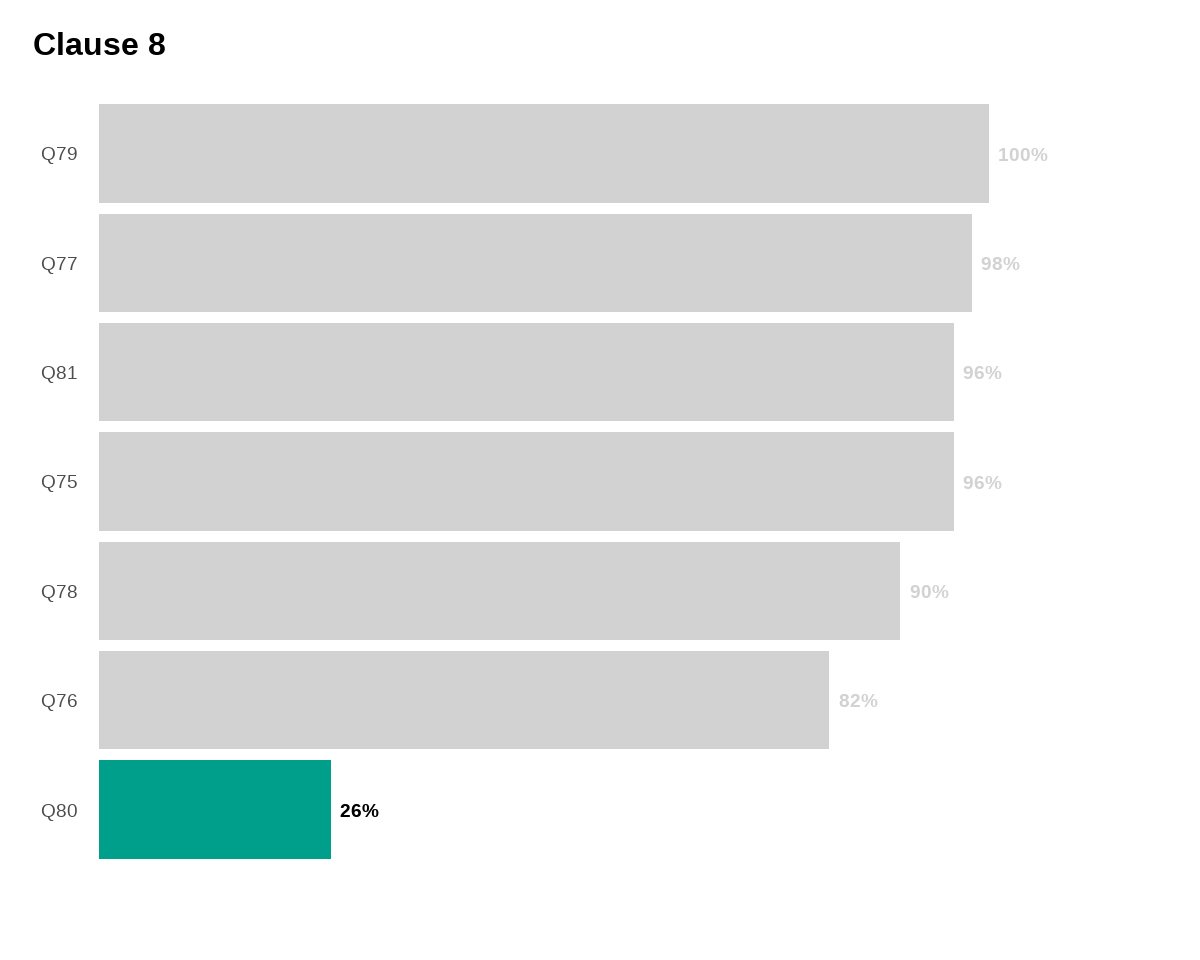

In [12]:
options(warn = -1)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

operation_df <- read.csv("data/slides9.csv")

# Create bar chart following the style pattern
operation_df |>
    mutate(lbl = paste0(round(Performance, 1), "%")) |>
    ggplot(aes(x = Performance, y = fct_reorder(Question, Performance))) +
    geom_col(fill = color_base) +
    geom_text(aes(label = lbl),
              hjust = 0, nudge_x = 1,
              size = 5, fontface = "bold", family = font_text) +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Clause 8",
        x = "",
        y = NULL
    ) +
    theme_quarto() +
    theme(
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 14, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    ) +
    gghighlight(Question == "Q80")

options(warn = 0)

## Slides 10


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 6.5108, df = 1, p-value = 0.01072


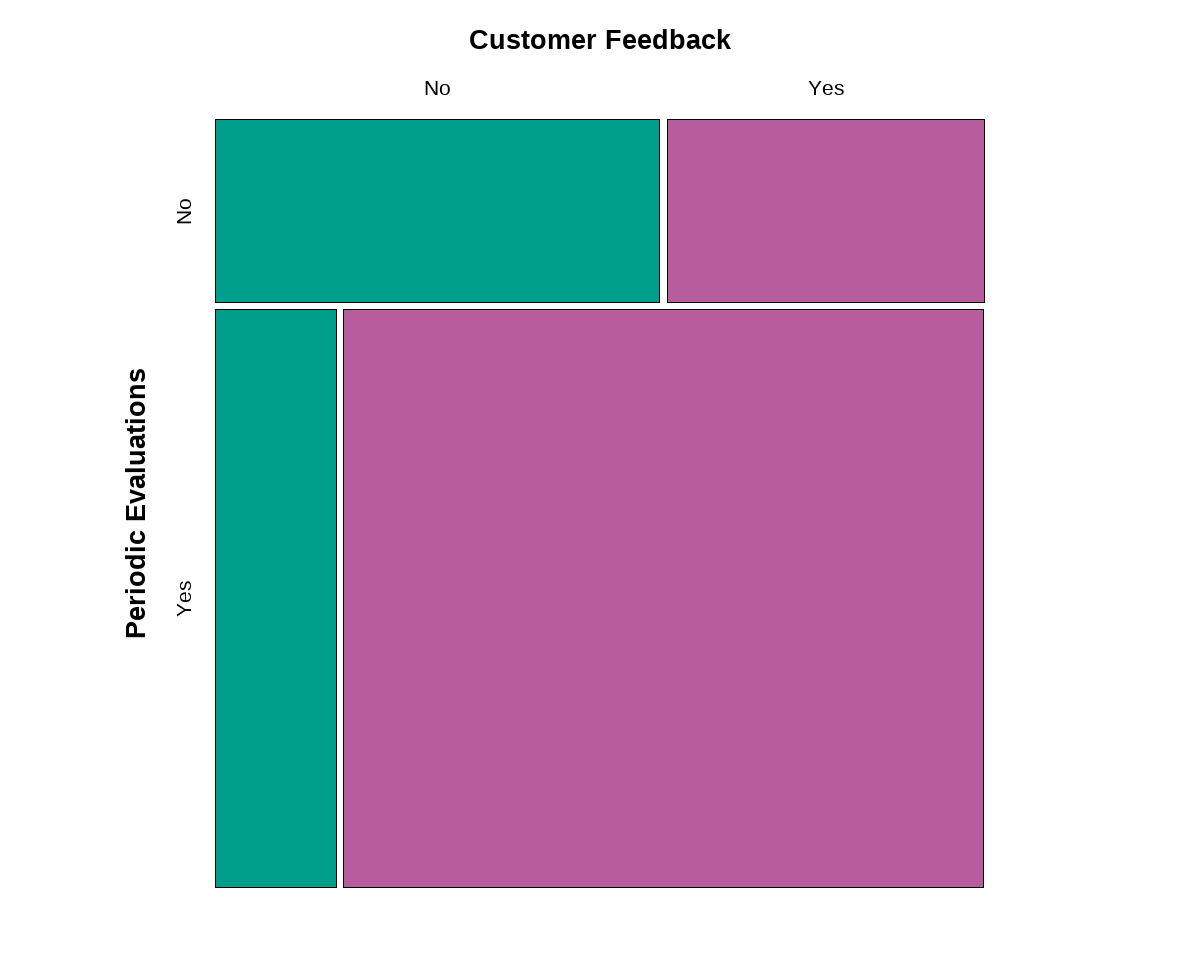

In [29]:
# Make sure vcd package is loaded
library(vcd)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

contingency_table <- read.csv("data/slides10a.csv", row.names = 1)

# Make it table format
contingency_table <- as.table(as.matrix(contingency_table))

chisq.test(contingency_table)

dimnames(contingency_table) <- list(
    "Periodic Evaluations" = c("No", "Yes"),
    "Customer Feedback" = c("No", "Yes"))

# Create the mosaic plot
mosaic(contingency_table, 
    shade=TRUE, 
    colorize=TRUE,
    gp=gpar(fill=c(color_base, color_base, color_accent, color_accent)),
    legend=FALSE, 
    main="",
    xlab="Business Evaluations",
    ylab="Customer Feedback",
    labeling_args = list(gp_labels = gpar(fontsize = 16, fontfamily = font_sans),
                  gp_varnames = gpar(fontsize = 20, fontfamily = font_title, fontface = "bold")))


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 2.059, df = 1, p-value = 0.1513


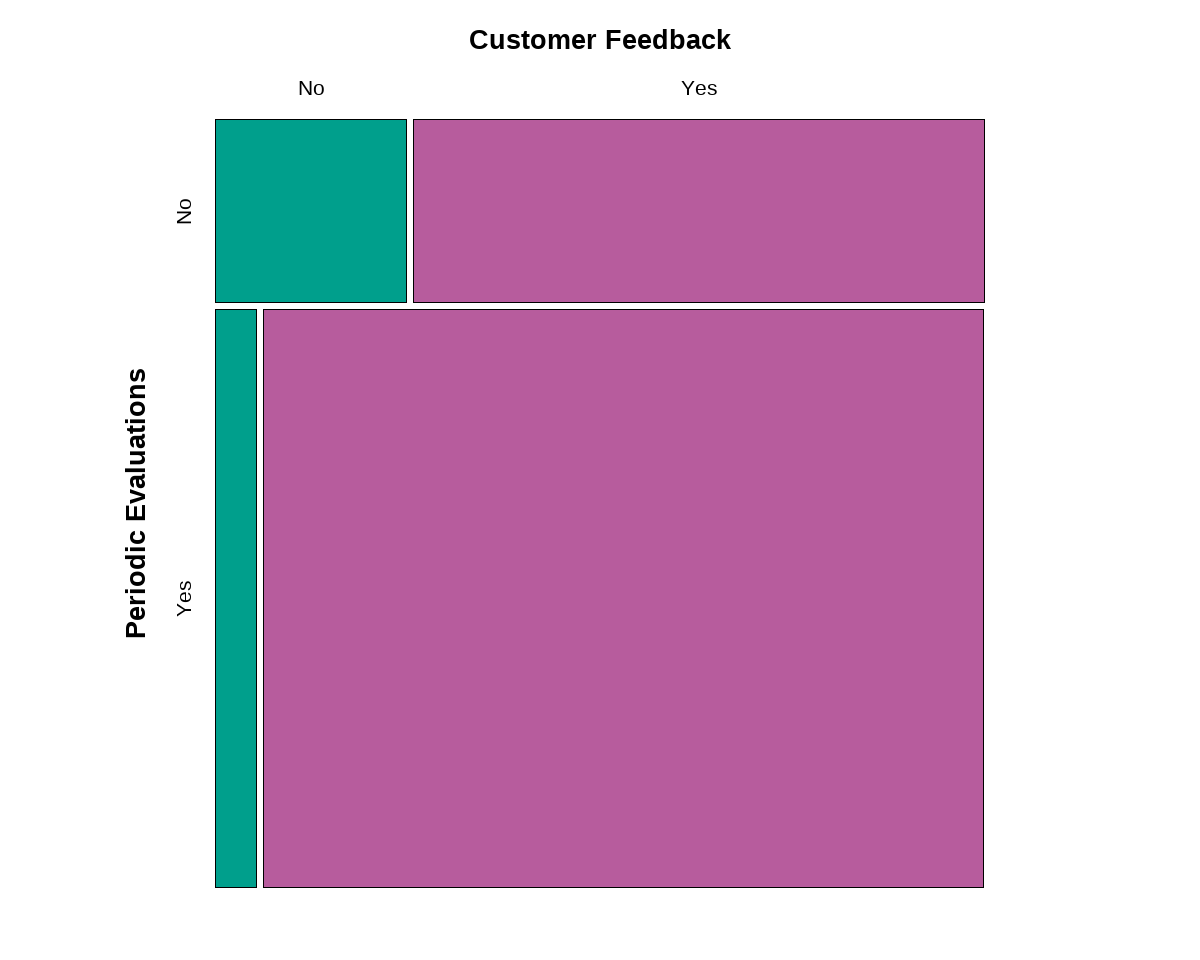

In [32]:
# Make sure vcd package is loaded
library(vcd)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

contingency_table <- read.csv("data/slides10b.csv", row.names = 1)

# Make it table format
contingency_table <- as.table(as.matrix(contingency_table))
chisq.test(contingency_table)

dimnames(contingency_table) <- list(
    "Periodic Evaluations" = c("No", "Yes"),
    "Customer Feedback" = c("No", "Yes"))

# Create the mosaic plot
mosaic(contingency_table, 
    shade=TRUE, 
    colorize=TRUE,
    gp=gpar(fill=c(color_base, color_base, color_accent, color_accent)),
    legend=FALSE, 
    main="",
    xlab="Business Evaluations",
    ylab="Regular Customer",
    labeling_args = list(gp_labels = gpar(fontsize = 16, fontfamily = font_sans),
                  gp_varnames = gpar(fontsize = 20, fontfamily = font_title, fontface = "bold")))


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 5.7152, df = 1, p-value = 0.01682


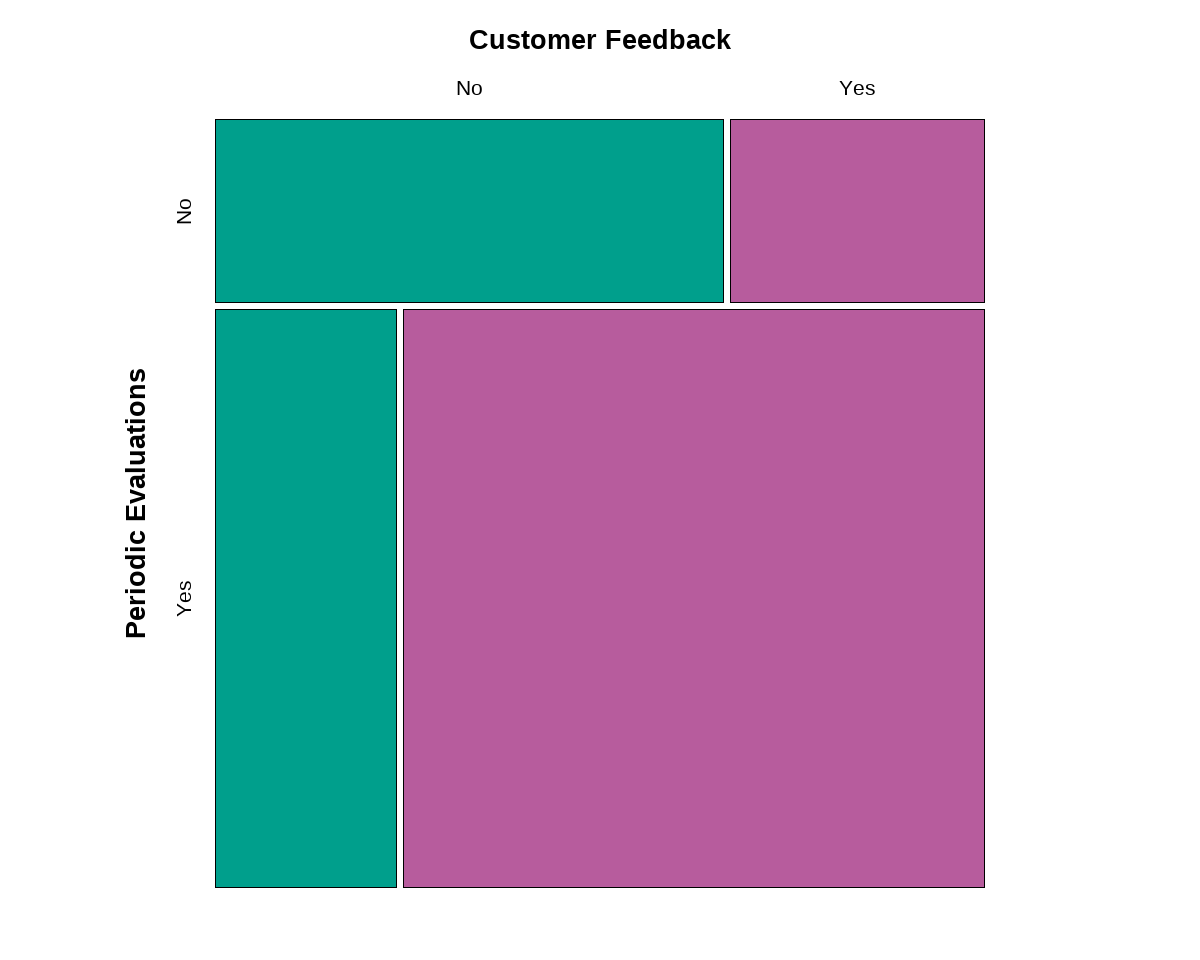

In [33]:
# Make sure vcd package is loaded
library(vcd)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

contingency_table <- read.csv("data/slides10c.csv", row.names = 1)

# Make it table format
contingency_table <- as.table(as.matrix(contingency_table))
chisq.test(contingency_table)

dimnames(contingency_table) <- list(
    "Periodic Evaluations" = c("No", "Yes"),
    "Customer Feedback" = c("No", "Yes"))

# Create the mosaic plot
mosaic(contingency_table, 
    shade=TRUE, 
    colorize=TRUE,
    gp=gpar(fill=c(color_base, color_base, color_accent, color_accent)),
    legend=FALSE, 
    main="",
    xlab="Business Evaluations",
    ylab="Customer Complaints",
    labeling_args = list(gp_labels = gpar(fontsize = 16, fontfamily = font_sans),
                  gp_varnames = gpar(fontsize = 20, fontfamily = font_title, fontface = "bold")))

## Slides 11 - Begin for regulators assessment

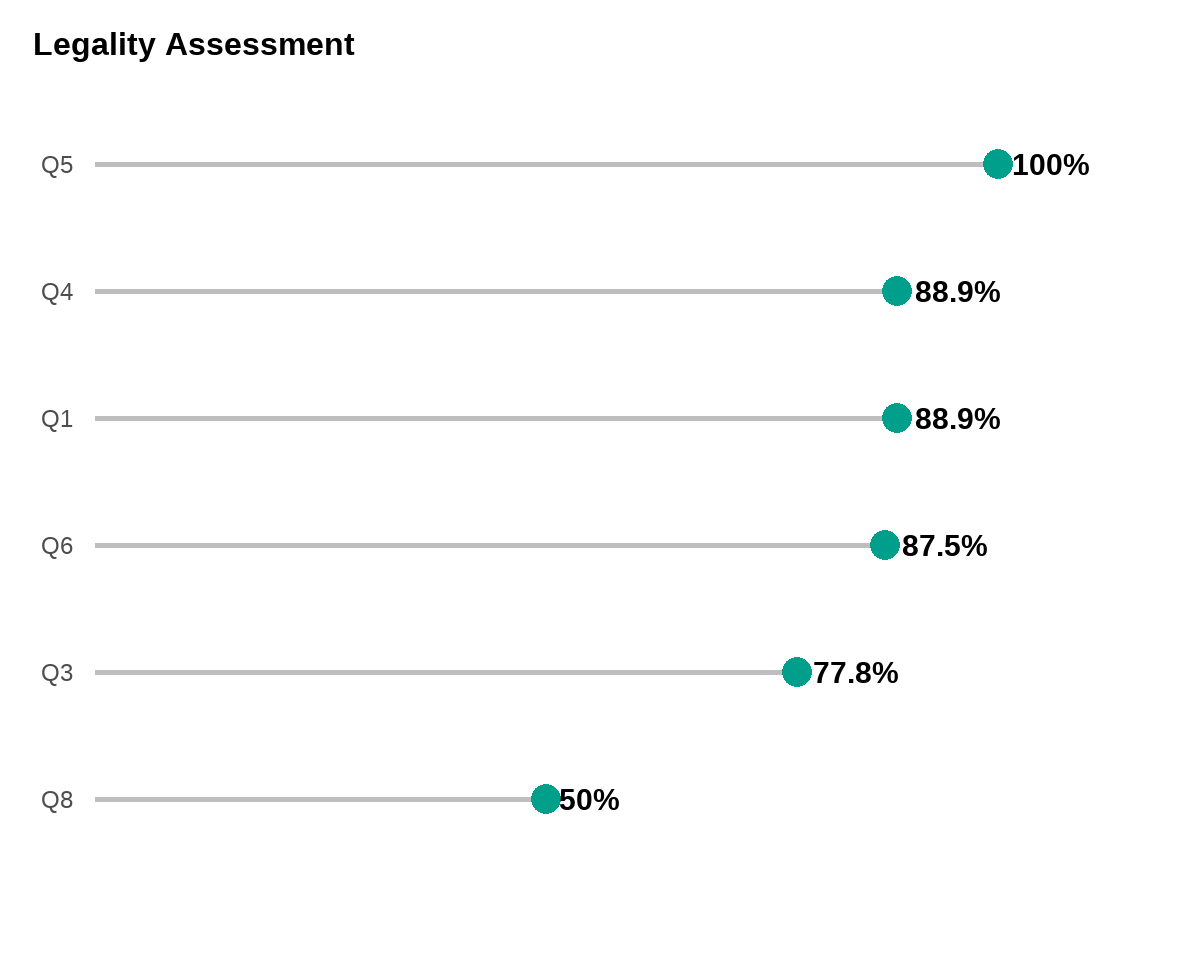

In [34]:
options(warn = -1)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

regulator_perf <- read.csv("data/slides11.csv")

# Create lollipop chart with custom styling
regulator_perf |>
    ggplot(aes(x = Performance, y = fct_reorder(Question, Performance))) +
    geom_segment(aes(x = 0, xend = Performance, y = Question, yend = Question), 
                 color = gray, size = 1.5) +
    geom_point(aes(color = ifelse(Performance < 50, color_accent, color_base)), 
               size = 8) +
    geom_text(aes(label = paste0(round(Performance, 1), "%")),
              hjust = -0.2, size = 8, fontface = "bold", family = font_text) +
    scale_color_identity() +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Legality Assessment",
        x = "",
        y = NULL
    ) +
    theme_quarto() +
    theme(
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 18, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    )

options(warn = 0)


## Slides 12

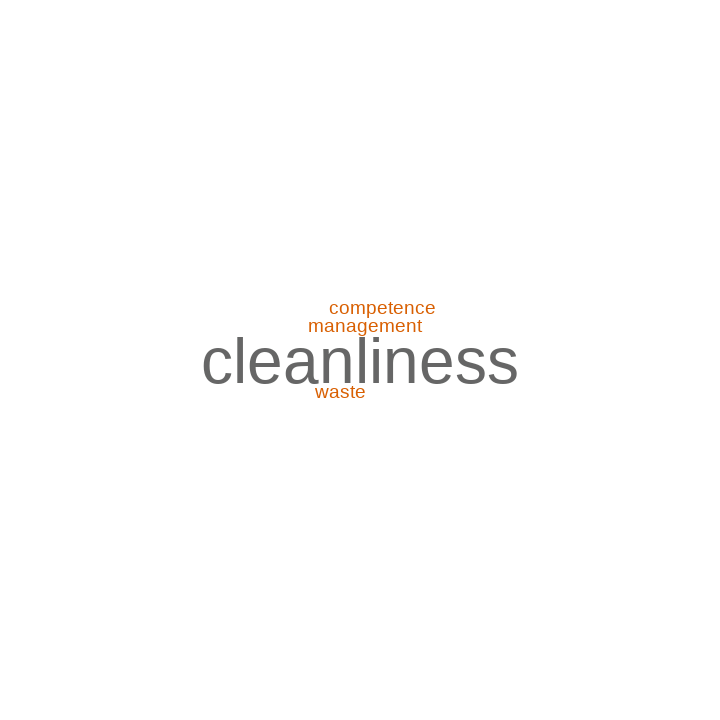

In [36]:
# word cloud for q14 (all horizontal)
library(wordcloud)
library(tm)
library(RColorBrewer)

options(repr.plot.width = 6, repr.plot.height = 6)

d_q14 <- read.csv("data/slides12.csv")
set.seed(1234)
wordcloud(
    words = d_q14$word,
    freq = d_q14$freq,
    min.freq = 1,
    max.words = 50,
    random.order = FALSE,
    rot.per = 0, # All horizontal
    colors = brewer.pal(8, "Dark2")
)


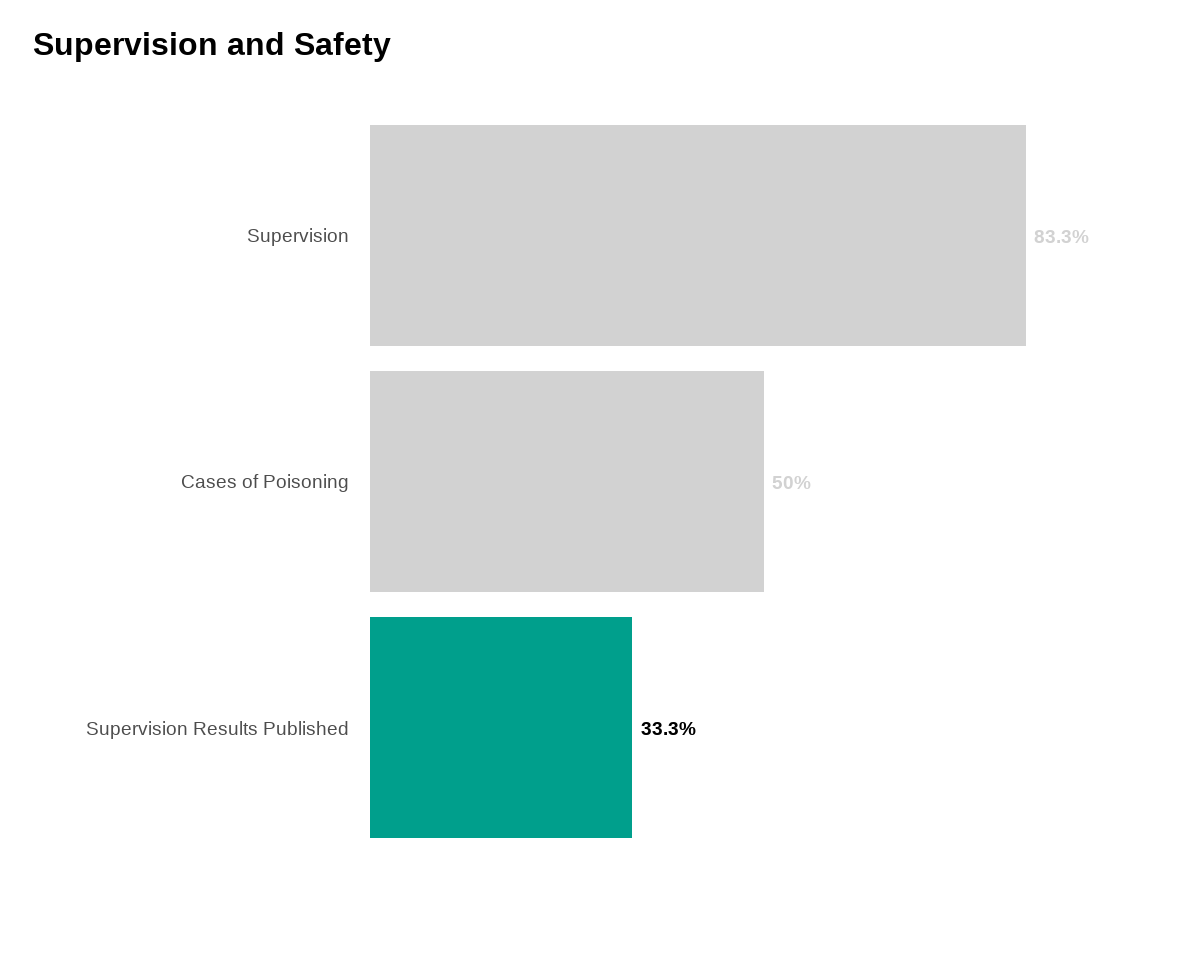

In [39]:
options(warn = -1)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

prop_yes <- read.csv("data/slides12a.csv")

# Create bar chart following the established style pattern with highlight
prop_yes |>
    mutate(lbl = paste0(round(Proportion, 1), "%")) |>
    ggplot(aes(x = Proportion, y = fct_reorder(Question, Proportion))) +
    geom_col(fill = color_base) +
    geom_text(aes(label = lbl),
              hjust = 0, nudge_x = 1,
              size = 5, fontface = "bold", family = font_text) +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Supervision and Safety",
        x = "",
        y = NULL
    ) +
    theme_quarto() +
    theme(
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 14, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    ) +
    gghighlight(Question == "Supervision Results Published")
options(warn = 0)

## Slides 13

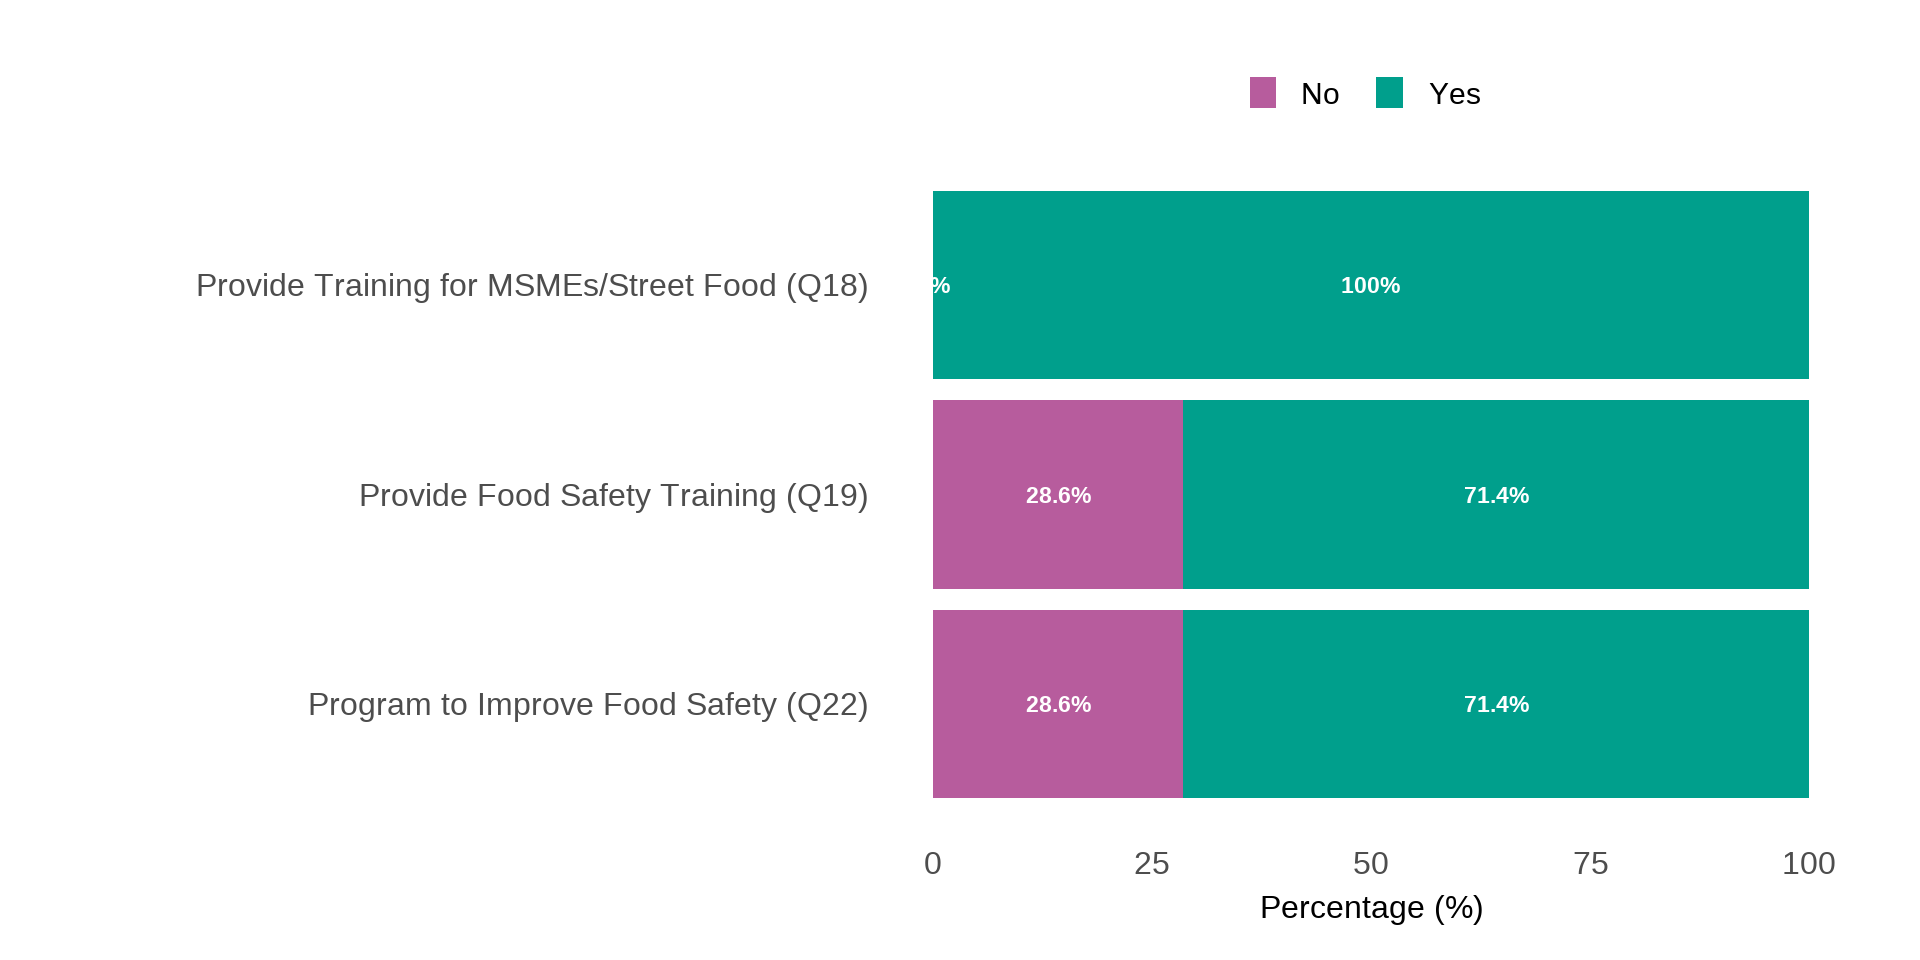

In [44]:
options(warn = -1)

# Set plot dimensions
options(repr.plot.width = 16, repr.plot.height = 8)

plot_data_long <- read.csv("data/slides13.csv")

# Reorder the Response factor to put "Yes" first
plot_data_long$Response <- factor(plot_data_long$Response, levels = c("Yes", "No"))

# Create stacked bar chart with custom styling
ggplot(plot_data_long, aes(x = Percent, y = Question, fill = Response)) +
    geom_bar(stat = "identity", position = "stack") +
    geom_text(aes(label = paste0(round(Percent, 1), "%")), 
              position = position_stack(vjust = 0.5), 
              size = 6, color = "white", fontface = "bold", family = font_text) +
    scale_fill_manual(values = c("Yes" = color_base, "No" = color_accent),
                      guide = guide_legend(reverse = TRUE)) +
    labs(title = "",
         x = "Percentage (%)", 
         y = NULL,
         fill = "Response") +
    theme_quarto() +
    theme(
        axis.text.x = element_text(family = font_sans),
        axis.text.y = element_text(family = font_sans),
        legend.position = "top",
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.margin = margin(20, 40, 20, 20)
    )

options(warn = 0)